<a href="https://colab.research.google.com/github/jayblue27/portfolio/blob/main/object_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

openCV yolo 구현
- 참고사이트
https://junha1125.github.io/blog/artificial-intelligence/2020-08-19-YOLO_OpenCV_DNN/

In [1]:
!pwd

/content


In [2]:
%cd drive/MyDrive/object_detector/

/content/drive/MyDrive/object_detector


In [3]:
!pwd

/content/drive/MyDrive/object_detector


In [4]:
!ls

config					     test2.jpg
darknet					     test3.jpg
food.codes				     test4.jpg
food-dark-yolov3-tiny_3l-v3-2_24000.weights  test.jpg
food-dark-yolov3-tiny_3l-v3-2.cfg	     yolov3.cfg
food.names				     yolov3.weights
object_detector.ipynb


darknet config, weight 파일 다운로드
- darknet 확인

In [12]:
!git clone https://github.com/pjreddie/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 5946, done.
remote: Total 5946 (delta 0), reused 0 (delta 0), pack-reused 5946
Receiving objects: 100% (5946/5946), 6.37 MiB | 7.02 MiB/s, done.
Resolving deltas: 100% (3928/3928), done.
Checking out files: 100% (979/979), done.


image shape: (589, 700, 3)


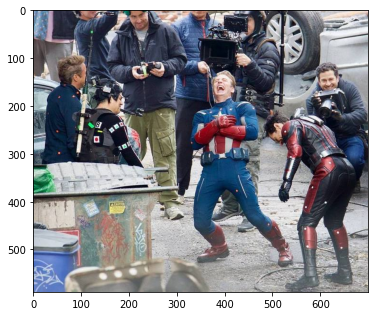

In [16]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('./test.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print('image shape:', img.shape)
plt.figure(figsize=(6, 6))
plt.imshow(img_rgb)

In [11]:
# weights 파일 다운
#!wget https://pjreddie.com/media/files/yolov3.weights

In [12]:
# cfg 파일 다운
#!wget https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg?raw=true -O ./yolov3.cfg

In [14]:
!ls

darknet  object_detector.ipynb	test.jpg  yolov3.cfg  yolov3.weights


In [7]:
import os
#가급적 절대 경로 사용. 
CUR_DIR = os.path.abspath('.')
weights_path = os.path.join(CUR_DIR, './yolov3.weights')
config_path =  os.path.join(CUR_DIR, './yolov3.cfg')
#config 파일 인자가 먼저 옴. 
cv_net_yolo = cv2.dnn.readNetFromDarknet(config_path, weights_path)

In [8]:
# class id 및 class 명 매핑
labels_to_names_seq = {0:'person',1:'bicycle',2:'car',3:'motorbike',4:'aeroplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',10:'fire hydrant',
                        11:'stop sign',12:'parking meter',13:'bench',14:'bird',15:'cat',16:'dog',17:'horse',18:'sheep',19:'cow',20:'elephant',
                        21:'bear',22:'zebra',23:'giraffe',24:'backpack',25:'umbrella',26:'handbag',27:'tie',28:'suitcase',29:'frisbee',30:'skis',
                        31:'snowboard',32:'sports ball',33:'kite',34:'baseball bat',35:'baseball glove',36:'skateboard',37:'surfboard',38:'tennis racket',39:'bottle',40:'wine glass',
                        41:'cup',42:'fork',43:'knife',44:'spoon',45:'bowl',46:'banana',47:'apple',48:'sandwich',49:'orange',50:'broccoli',
                        51:'carrot',52:'hot dog',53:'pizza',54:'donut',55:'cake',56:'chair',57:'sofa',58:'pottedplant',59:'bed',60:'diningtable',
                        61:'toilet',62:'tvmonitor',63:'laptop',64:'mouse',65:'remote',66:'keyboard',67:'cell phone',68:'microwave',69:'oven',70:'toaster',
                        71:'sink',72:'refrigerator',73:'book',74:'clock',75:'vase',76:'scissors',77:'teddy bear',78:'hair drier',79:'toothbrush' }

In [9]:
labels_to_names = {1:'person',2:'bicycle',3:'car',4:'motorcycle',5:'airplane',6:'bus',7:'train',8:'truck',9:'boat',10:'traffic light',
                    11:'fire hydrant',12:'street sign',13:'stop sign',14:'parking meter',15:'bench',16:'bird',17:'cat',18:'dog',19:'horse',20:'sheep',
                    21:'cow',22:'elephant',23:'bear',24:'zebra',25:'giraffe',26:'hat',27:'backpack',28:'umbrella',29:'shoe',30:'eye glasses',
                    31:'handbag',32:'tie',33:'suitcase',34:'frisbee',35:'skis',36:'snowboard',37:'sports ball',38:'kite',39:'baseball bat',40:'baseball glove',
                    41:'skateboard',42:'surfboard',43:'tennis racket',44:'bottle',45:'plate',46:'wine glass',47:'cup',48:'fork',49:'knife',50:'spoon',
                    51:'bowl',52:'banana',53:'apple',54:'sandwich',55:'orange',56:'broccoli',57:'carrot',58:'hot dog',59:'pizza',60:'donut',
                    61:'cake',62:'chair',63:'couch',64:'potted plant',65:'bed',66:'mirror',67:'dining table',68:'window',69:'desk',70:'toilet',
                    71:'door',72:'tv',73:'laptop',74:'mouse',75:'remote',76:'keyboard',77:'cell phone',78:'microwave',79:'oven',80:'toaster',
                    81:'sink',82:'refrigerator',83:'blender',84:'book',85:'clock',86:'vase',87:'scissors',88:'teddy bear',89:'hair drier',90:'toothbrush',
                    91:'hair brush'}

In [17]:
#전체 Darknet layer에서 13x13 grid, 26x26, 52x52 grid에서 detect된 Output layer만 filtering
layer_names = cv_net_yolo.getLayerNames()
# layer_names : ['conv_0', 'bn_0', 'relu_1', 'conv_1', 'bn_1', 'relu_2', 'conv_ ....
outlayer_names = [layer_names[i[0] - 1] for i in cv_net_yolo.getUnconnectedOutLayers()]
# cv_net_yolo.getUnconnectedOutLayers() : [[200], [227], [254]]

print('output_layer name:', outlayer_names)

# Yolov3 416는 416 x 416 Input을 받는다. 원본 이미지 배열을 사이즈 (416, 416)으로, BGR을 RGB로 변환하여 배열 입력
# blobFromImage를 사용해서 CNN에 넣어야할 이미지 전처리를 쉽게 한다.
# DarkNet에서는 scalefactor를 꼭 처리해줘야한다!
out = cv2.dnn.blobFromImage(img, scalefactor=1/255.0, size=(416, 416), swapRB=True, crop=False)
print('type : ', type(out))
print('shape :', out.shape)
print('size :', out.size)

 # 말그대로 신경망에 넣을 사진만 Setting 해준다. 
cv_net_yolo.setInput(out)  
# Object Detection 수행하여 결과를 cv_out으로 반환 
cv_outs = cv_net_yolo.forward(outlayer_names)  # inference를 돌려서 원하는 layer의 Feature Map 정보만 뽑아 낸다. 
print('cv_outs type : list // cv_outs length :', len(cv_outs))
print("cv_outs[0] : 첫번째 FeatureMap 13 x 13 x 85, cv_outs[1] : 두번째 FeatureMap 26 x 26 x 85 ")

# bounding box의 테두리와 caption 글자색 지정
green_color=(0, 255, 0)
red_color=(0, 0, 255)


output_layer name: ['yolo_82', 'yolo_94', 'yolo_106']
type :  <class 'numpy.ndarray'>
shape : (1, 3, 416, 416)
size : 519168
cv_outs type : list // cv_outs length : 3
cv_outs[0] : 첫번째 FeatureMap 13 x 13 x 85, cv_outs[1] : 두번째 FeatureMap 26 x 26 x 85 


In [18]:
import numpy as np

# 원본 이미지를 네트웍에 입력시에는 (416, 416)로 resize 함. 
# 이후 결과가 출력되면 resize된 이미지 기반으로 bounding box 위치가 예측 되므로 이를 다시 원복하기 위해 원본 이미지 shape정보 필요
rows = img.shape[0]
cols = img.shape[1]

conf_threshold = 0.5
nms_threshold = 0.4   # 이 값이 클 수록 box가 많이 사라짐. 조금만 겹쳐도 NMS로 둘 중 하나 삭제하므로

class_ids = []
confidences = []
boxes = []

# 3개의 개별 output layer별로 Detect된 Object들에 대해서 Detection 정보 추출 및 시각화 
for ix, output in enumerate(cv_outs):
    print('output shape:', output.shape)
    # Detected된 Object별 iteration
    for jx, detection in enumerate(output):
        # class score는 detetection배열에서 5번째 이후 위치에 있는 값. 즉 6번쨰~85번째 까지의 값
        scores = detection[5:]
        # scores배열에서 가장 높은 값을 가지는 값이 class confidence, 그리고 그때의 위치 인덱스가 class id
        class_id = np.argmax(scores)
        confidence = scores[class_id] # 5번쨰 값은 objectness score이다. 객체인지 아닌지의 확률이다. 6번쨰~85번째 까지의 값이 그 객체일 확률 값이다. 

        # confidence가 지정된 conf_threshold보다 작은 값은 제외 
        if confidence > conf_threshold:
            print('ix:', ix, 'jx:', jx, 'class_id', class_id, 'confidence:', confidence)
            # detection은 scale된 좌상단, 우하단 좌표를 반환하는 것이 아니라, detection object의 중심좌표와 너비/높이를 반환
            # 원본 이미지에 맞게 scale 적용 및 좌상단, 우하단 좌표 계산
            center_x = int(detection[0] * cols)
            center_y = int(detection[1] * rows)
            width = int(detection[2] * cols)
            height = int(detection[3] * rows)
            left = int(center_x - width / 2)
            top = int(center_y - height / 2)
            # 3개의 개별 output layer별로 Detect된 Object들에 대한 class id, confidence, 좌표정보를 모두 수집
            class_ids.append(class_id)
            confidences.append(float(confidence))

            boxes.append([left, top, width, height])

output shape: (507, 85)
ix: 0 jx: 42 class_id 0 confidence: 0.5714321
ix: 0 jx: 169 class_id 0 confidence: 0.9940027
ix: 0 jx: 175 class_id 0 confidence: 0.93635464
ix: 0 jx: 229 class_id 0 confidence: 0.9315065
ix: 0 jx: 295 class_id 0 confidence: 0.9985572
ix: 0 jx: 343 class_id 0 confidence: 0.9977337
output shape: (2028, 85)
ix: 1 jx: 239 class_id 0 confidence: 0.87026995
ix: 1 jx: 677 class_id 0 confidence: 0.652009
ix: 1 jx: 710 class_id 0 confidence: 0.9872895
ix: 1 jx: 800 class_id 0 confidence: 0.96948886
ix: 1 jx: 818 class_id 0 confidence: 0.96036696
ix: 1 jx: 851 class_id 0 confidence: 0.9759545
output shape: (8112, 85)


In [19]:
conf_threshold = 0.5
nms_threshold = 0.4
idxs = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

print(idxs) # 이 index의 box만 살아남았음을 의미한다.

[[ 4]
 [ 5]
 [ 1]
 [ 8]
 [11]
 [ 9]
 [10]
 [ 6]
 [ 7]]


orange: 0.9980
banana: 0.9837
apple: 0.9835


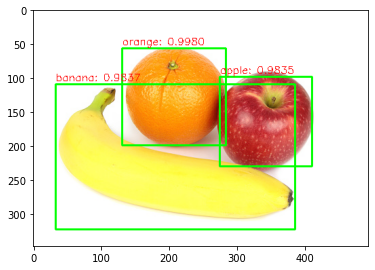

In [14]:
# cv2의 rectangle()은 인자로 들어온 이미지 배열에 직접 사각형을 업데이트 하므로 그림 표현을 위한 별도의 이미지 배열 생성. 
draw_img = img.copy()

# NMS로 최종 filtering된 idxs를 이용하여 boxes, classes, confidences에서 해당하는 Object정보를 추출하고 시각화.
if len(idxs) > 0:
    for i in idxs.flatten():
        box = boxes[i]
        left = box[0]
        top = box[1]
        width = box[2]
        height = box[3]
        # labels_to_names 딕셔너리로 class_id값을 클래스명으로 변경. opencv에서는 class_id + 1로 매핑해야함.
        caption = "{}: {:.4f}".format(labels_to_names_seq[class_ids[i]], confidences[i])
        #cv2.rectangle()은 인자로 들어온 draw_img에 사각형을 그림. 위치 인자는 반드시 정수형.
        cv2.rectangle(draw_img, (int(left), int(top)), (int(left+width), int(top+height)), color=green_color, thickness=2)
        cv2.putText(draw_img, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, red_color, 1)
        print(caption)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6, 6))
plt.imshow(img_rgb)

person: 0.9986
person: 0.9977
person: 0.9940
person: 0.9873
person: 0.9760
person: 0.9695
person: 0.9604
person: 0.8703
person: 0.6520


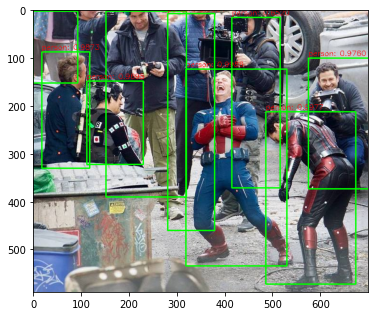

In [23]:
# cv2의 rectangle()은 인자로 들어온 이미지 배열에 직접 사각형을 업데이트 하므로 그림 표현을 위한 별도의 이미지 배열 생성. 
draw_img = img.copy()

if len(idxs) > 0:
    for i in idxs.flatten():
        box = boxes[i]
        left = box[0]
        top = box[1]
        width = box[2]
        height = box[3]
        # labels_to_names 딕셔너리로 class_id값을 클래스명으로 변경. opencv에서는 class_id + 1로 매핑해야함.
        caption = "{}: {:.4f}".format(labels_to_names_seq[class_ids[i]], confidences[i])
        #cv2.rectangle()은 인자로 들어온 draw_img에 사각형을 그림. 위치 인자는 반드시 정수형.
        cv2.rectangle(draw_img, (int(left), int(top)), (int(left+width), int(top+height)), color=green_color, thickness=2)
        cv2.putText(draw_img, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, red_color, 1)
        print(caption)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6, 6))
plt.imshow(img_rgb)
plt.show()